# Introduction to Financial Forecasting with Python

Welcome to our session on financial forecasting using Python! In this module, we'll dive into the fascinating world of time series analysis and prediction. We'll start by exploring a basic forecasting model using synthetic data to understand the fundamentals of time series forecasting. This will set the foundation for more complex analyses that you'll encounter in real-world financial data.

## The Original Code: A Starting Point
We begin with a Python script that generates synthetic financial data. This data simulates a simple financial time series with a linear trend and some random noise, mimicking a basic scenario in financial forecasting. We'll use this data to:

- Understand the structure of time series data.
- Learn how to split data appropriately for time series forecasting.
- Explore the application of linear regression in a time series context.
- Visualize and evaluate the performance of our forecasting model.

## Upcoming Assignment
After familiarizing yourselves with the original code, you will be tasked with an assignment that builds on these concepts. You'll apply your skills to real financial data, where you will:

- Engage in more complex feature engineering.
- Experiment with different forecasting models.
- Analyze and compare the performance of your models.

The details of the assignment will be provided later in this Jupyter Notebook. This will be your opportunity to apply the concepts learned in a more realistic and challenging setting.

So, let's get started with the original code and begin our journey into the world of financial forecasting!


In [1]:
#!pip install pmdarima

# Financial Forecasting in Python: Code Summary

## Overview
This code is a hands-on introduction to financial forecasting using Python. We generate synthetic financial data and apply two different forecasting models: Linear Regression and ARIMA. The goal is to predict future trends based on historical data.

## Key Components

### 1. Data Generation and Preprocessing
- We start by creating synthetic financial data. This approach is great for learning as it avoids the complexities of real-world data.
- The dataset is divided into two parts: training data for building our models and testing data for evaluating them.

### 2. Linear Regression Model
- First, we use a simple linear regression model. It's a basic yet powerful tool for trend forecasting.
- After fitting the model to the training data, we make predictions for the test data.
- We calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the model's accuracy.

### 3. ARIMA Model
- Next, we explore the ARIMA model, a more advanced method for time series forecasting.
- `auto_arima` helps us automatically find the best parameters for the ARIMA model.
- Like with linear regression, we evaluate the ARIMA model's performance using MAE, MSE, and RMSE.

### 4. Visualization
- We plot the actual and predicted trends for both models. This visual representation helps us understand how well our models are performing.
- By comparing these plots, you can visually assess the accuracy of each model.


## Conclusion
This code is a stepping stone into the world of financial forecasting. It provides a balance between theory and practice, making it suitable for all of you, regardless of your experience level in data science.

Remember, the key to learning data science is experimentation and curiosity. So, dive in, tweak the code, and see what insights you can uncover!


# Time Series Analysis Assignment: Predicting Stock Prices

## Core Assignment (100 points total)

### Setup and Data Acquisition (0 points)
```python
# Install yfinance package
!pip install yfinance

# Import yfinance and download Apple Inc. stock data
import yfinance as yf
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
```

### Objective:
Students will utilize provided financial data to construct predictive models using linear regression and exponential smoothing. They will then assess the models' performance using various metrics.

### Instructions and Point Breakdown:

- **Model Building (40 points)**
  - Implement linear regression using the rolling averages as features. (20 points)
  - Create an Exponential Smoothing model that accounts for trend and seasonality. (20 points)

- **Performance Metrics (20 points)**
  - Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for each model.
  - Provide commentary on the performance of each model based on these metrics.

- **Model Comparison and Interpretation (40 points)**
  - Compare the forecasted values against the actual values in the test set visually using a plot. (10 points)
  - Interpret the results of each model and discuss any potential reasons for differences in performance. (15 points)
  - Discuss the implications of model performance for real-world decision-making in finance. (15 points)

# Exponential Smoothing Overview

## What is Exponential Smoothing?

Exponential Smoothing is a time series forecasting method for univariate data. This technique is used to produce a smoothed time series, where the raw data points are weighted in such a way that the most recent data points have more influence on the forecast than older data points. It's particularly useful for data with trends and seasonal patterns.

## How is Exponential Smoothing Created?

The basic idea behind exponential smoothing is to compute the forecasted value at time `t` by applying weighted averages of past observations where the weights decay exponentially as observations get older. The formula for Simple Exponential Smoothing is:

$$ \hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_t $$

where:
- $\hat{y}_{t+1}$ is the forecast for the next period.
- $y_t$ is the actual value at time `t`.
- $\hat{y}_t$ is the forecasted value at time `t`.
- $\alpha$ is the smoothing factor, ranging from 0 to 1.

## Unique Aspects of Exponential Smoothing

- **Adaptability**: It can adapt more quickly to changes in the level of the series.
- **Weighting**: Recent observations are given more weight, making it more responsive to changes in the data.
- **Simplicity**: It requires fewer parameters and is easier to understand and compute.

## When to Use Exponential Smoothing

It's most effective when your data:
- Shows no clear trend or seasonal patterns (Simple Exponential Smoothing).
- Shows a trend but no seasonality (Double Exponential Smoothing).
- Shows both trend and seasonality (Triple Exponential Smoothing, also known as Holt-Winters method).

## Example with Python Code

/var/folders/hb/nkxmxsw97pdfl0tp0wlzf79m0000gn/T/ipykernel_58923/1651369355.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range(start='2019-01-01', periods=len(data), freq='M')


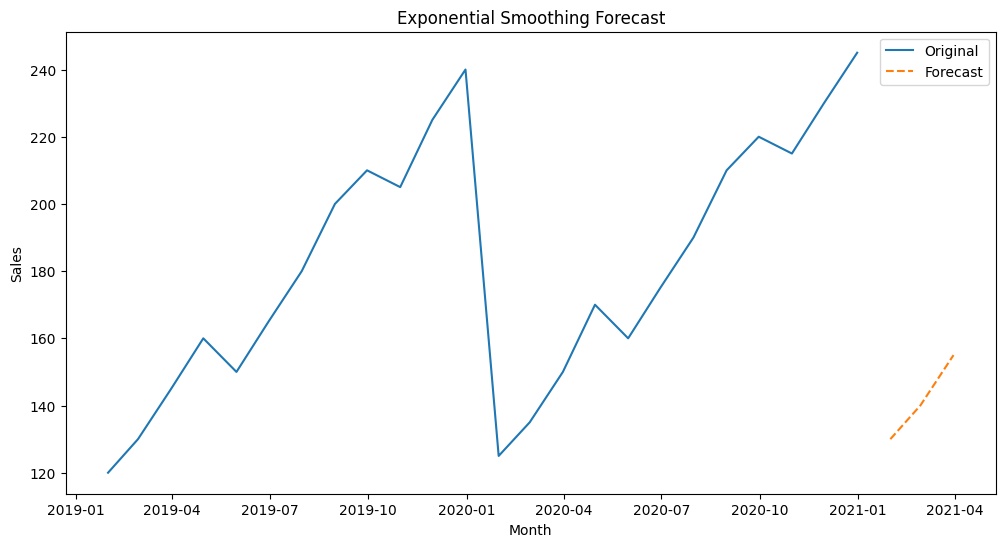

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Hypothetical monthly sales data for two years
data = [120, 130, 145, 160, 150, 165, 180, 200, 210, 205, 225, 240,
        125, 135, 150, 170, 160, 175, 190, 210, 220, 215, 230, 245]

# Convert data to pandas Series with a datetime index
index = pd.date_range(start='2019-01-01', periods=len(data), freq='M')
series = pd.Series(data, index=index)

# Apply Exponential Smoothing with trend and seasonality
model_sm = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next 3 periods
forecast = model_sm.forecast(3)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [4]:
# !pip install yfinance

# Modify this code for the assignment
## This code provides you with the data pull, moving averages and train/test split

<H3>Exploratory Data Analysis</H3>

In [5]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np

# Set display options to control wrapping
pd.set_option('display.max_columns', None)  # Do not truncate the list of columns
pd.set_option('display.max_rows', None)     # Do not truncate the list of rows
pd.set_option('display.width', 1000)        # Set the display width to a large value
pd.set_option('display.max_colwidth', 50)   # Set the maximum column width
pd.set_option('display.colheader_justify', 'left')  # Justify column headers to the left

# Data Acquisition
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
stock_data.sort_index(ascending=True, inplace=True)
#save as csv
# stock_data.to_csv('./AAPL_Stock_Data.csv')

# Ensure proper DatetimeIndex with frequency for time series analysis
stock_data.index = pd.to_datetime(stock_data.index)
# stock_data = stock_data.asfreq('B', method='ffill')

print('\n-------Raw Data-------')
print(np.round(stock_data.head(),2))
print('\n-------Examine Dataset Colummns-------')
print(stock_data.info())
print(np.round(stock_data.describe().T,2))

[*********************100%***********************]  1 of 1 completed


-------Raw Data-------
Price      Adj Close Close   High    Low     Open    Volume    
Ticker     AAPL      AAPL    AAPL    AAPL    AAPL    AAPL      
Date                                                           
2022-01-03  179.08    182.01  182.88  177.71  177.83  104487900
2022-01-04  176.80    179.70  182.94  179.12  182.63   99310400
2022-01-05  172.10    174.92  180.17  174.64  179.61   94537600
2022-01-06  169.23    172.00  175.30  171.64  172.70   96904000
2022-01-07  169.40    172.17  174.14  171.03  172.89   86709100

-------Examine Dataset Colummns-------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  501 non-null    float64
 1   (Close, AAPL)      501 non-null    float64
 2   (High, AAPL)       501 non-null    float64
 3   (Low, AAPL)        501 non-null    float64
 4   (Open, A

In [6]:
#print all the entries between two dates
print(stock_data.loc['2022-01-01':'2022-01-10'])

Price      Adj Close   Close       High        Low         Open        Volume    
Ticker     AAPL        AAPL        AAPL        AAPL        AAPL        AAPL      
Date                                                                             
2022-01-03  179.076599  182.009995  182.880005  177.710007  177.830002  104487900
2022-01-04  176.803802  179.699997  182.940002  179.119995  182.630005   99310400
2022-01-05  172.100845  174.919998  180.169998  174.639999  179.610001   94537600
2022-01-06  169.227951  172.000000  175.300003  171.639999  172.699997   96904000
2022-01-07  169.395187  172.169998  174.139999  171.029999  172.889999   86709100
2022-01-10  169.414871  172.190002  172.500000  168.169998  169.080002  106765600


<B>Observations:</B>

- The dataset contains stock pricce data for Apple Inc. (ticker symbol: AAPL) for a period of 501 days from 2022-01-03 through 2023-12-29. The dataset contains data only from business days since the stock market does not operate on weekends and holidays.
- It has the following columns:
    - <U>Date:</U> The date on which the data was recorded. 
    - <U>Close (Closing Price):</U> This is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.
    - <U>Adj Close (Adjusted Closing Price):</U> Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions. Data is adjusted using appropriate split and dividend multipliers, providing a more accurate historical price comparison.
    - <U>High:</U> The highest price the stock reached during the trading day.
    - <U>Low:</U> The lowest price the stock reached during the trading day.
    - <U>Open:</U> The price at which the stock first traded on a given day. 
    - <U>Volume:</U> The total number of shares traded during the day. 

In [7]:
#look for missing values
missing_values = stock_data.isna().sum()
print('\n-------Missing Values-------')
print(missing_values)


-------Missing Values-------
Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64


<B>Observations:</B>
- Missing data can significantly impact time-series forecasting. There are no missing values in any of the columns of the dataset.

In [8]:
# Set display options to avoid printing in exponential format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(np.round(stock_data.describe().T,4))
print("Stock data shape: ", stock_data.shape)

                  count  mean        std         min         25%         50%         75%         max        
Price     Ticker                                                                                            
Adj Close AAPL   501.00      162.01       17.82      123.72      147.59      162.92      174.99       197.14
Close     AAPL   501.00      163.67       17.70      125.02      149.35      165.02      176.28       198.11
High      AAPL   501.00      165.37       17.44      127.77      150.92      166.33      177.99       199.62
Low       AAPL   501.00      161.82       17.97      124.17      147.24      162.95      174.82       197.00
Open      AAPL   501.00      163.51       17.74      126.01      148.87      164.59      176.48       198.02
Volume    AAPL   501.00 73592338.72 25365106.08 24048300.00 54147100.00 69246000.00 86709100.00 182602000.00
Stock data shape:  (501, 6)


In [9]:
print(stock_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  501 non-null    float64
 1   (Close, AAPL)      501 non-null    float64
 2   (High, AAPL)       501 non-null    float64
 3   (Low, AAPL)        501 non-null    float64
 4   (Open, AAPL)       501 non-null    float64
 5   (Volume, AAPL)     501 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 43.6 KB
None


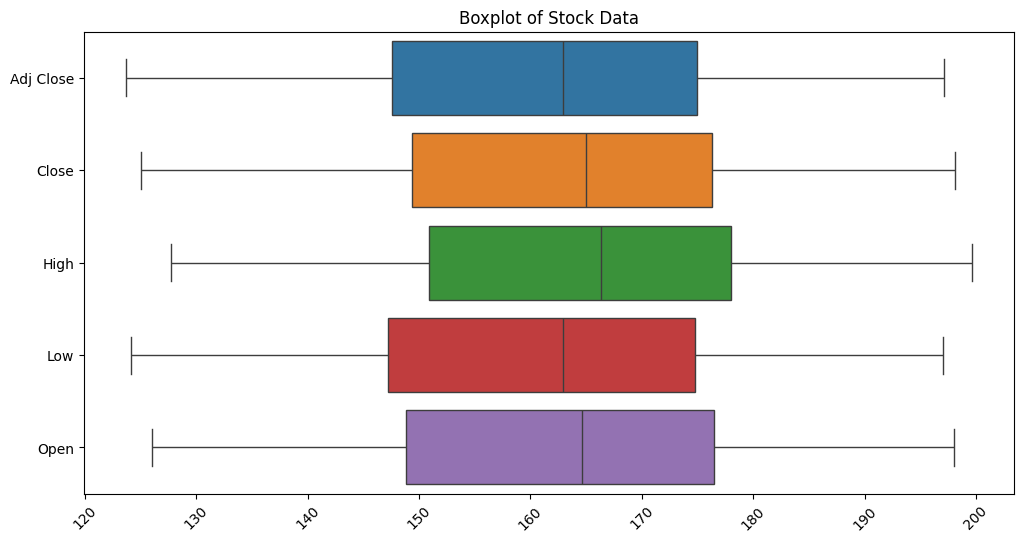

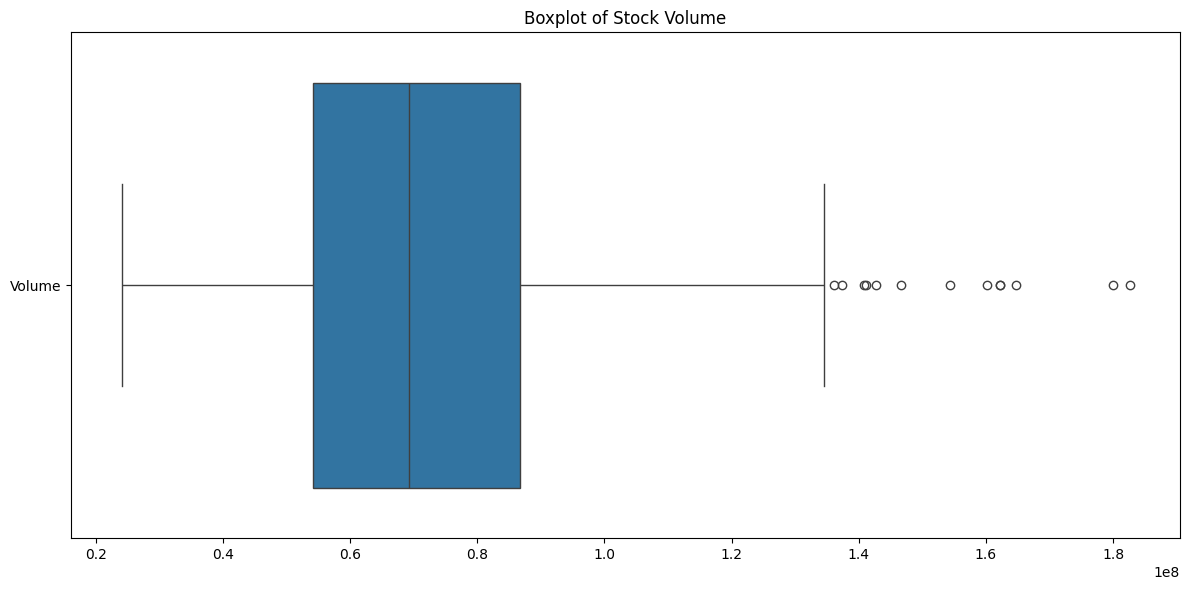

In [10]:
#Look for outliers using boxplot
#plot all numerical columns, except the 'Volume' column

plt.figure(figsize=(12, 6))
sns.boxplot(data=stock_data.drop(columns='Volume'), orient='h')
plt.title('Boxplot of Stock Data')
plt.xticks(rotation=45)
plt.show()

#plot the 'Volume' column separately
plt.figure(figsize=(12, 6))
sns.boxplot(data=stock_data[['Volume']],orient='h')
plt.title('Boxplot of Stock Volume')
plt.tight_layout()
plt.show()


<H4>Calculate Rolling Averages:</H4>

In [11]:
# Calculate rolling averages
stock_data['Target'] = stock_data['Adj Close'].shift(-1) # next day's price
stock_data['7_day_avg'] = stock_data['Adj Close'].rolling(window=7, min_periods=1).mean()
stock_data['30_day_avg'] = stock_data['Adj Close'].rolling(window=30, min_periods=1).mean()

print(stock_data.head(10))

#look for null or missing values
missing_values = stock_data.isna().sum()
print('\n-------Missing Values-------')
print(missing_values)

# Drop rows with missing values
stock_data.dropna(inplace=True)

print('-------Engineered Data-------')
print(np.round(stock_data.describe(),2))

Price      Adj Close Close  High   Low    Open   Volume     Target 7_day_avg 30_day_avg
Ticker     AAPL      AAPL   AAPL   AAPL   AAPL   AAPL                                  
Date                                                                                   
2022-01-03 179.08    182.01 182.88 177.71 177.83  104487900 176.80 179.08    179.08    
2022-01-04 176.80    179.70 182.94 179.12 182.63   99310400 172.10 177.94    177.94    
2022-01-05 172.10    174.92 180.17 174.64 179.61   94537600 169.23 175.99    175.99    
2022-01-06 169.23    172.00 175.30 171.64 172.70   96904000 169.40 174.30    174.30    
2022-01-07 169.40    172.17 174.14 171.03 172.89   86709100 169.41 173.32    173.32    
2022-01-10 169.41    172.19 172.50 168.17 169.08  106765600 172.26 172.67    172.67    
2022-01-11 172.26    175.08 175.18 170.82 172.32   76138300 172.70 172.61    172.61    
2022-01-12 172.70    175.53 177.18 174.82 176.12   74805200 169.41 171.70    172.62    
2022-01-13 169.41    172.19 176.

<B>Observations:</B>
- The use of moving averages causes an overlap between independent columns and dependent column that needs to be forecast i.e. 'Adj Close'
- A new column 'Target' is introduced into the dataset to eliminate any overlap between independent variables (features) '7_day_avg', '30_day_avg' and dependent variable 'Adj Close'. 
- The new column 'Target' is the same as 'Adj Close' except that it is shifted by one day to eliminate the above-mentioned overlap and it will be used as the label for prediction in-lieu of 'Adj Close'

<Figure size 1200x600 with 0 Axes>

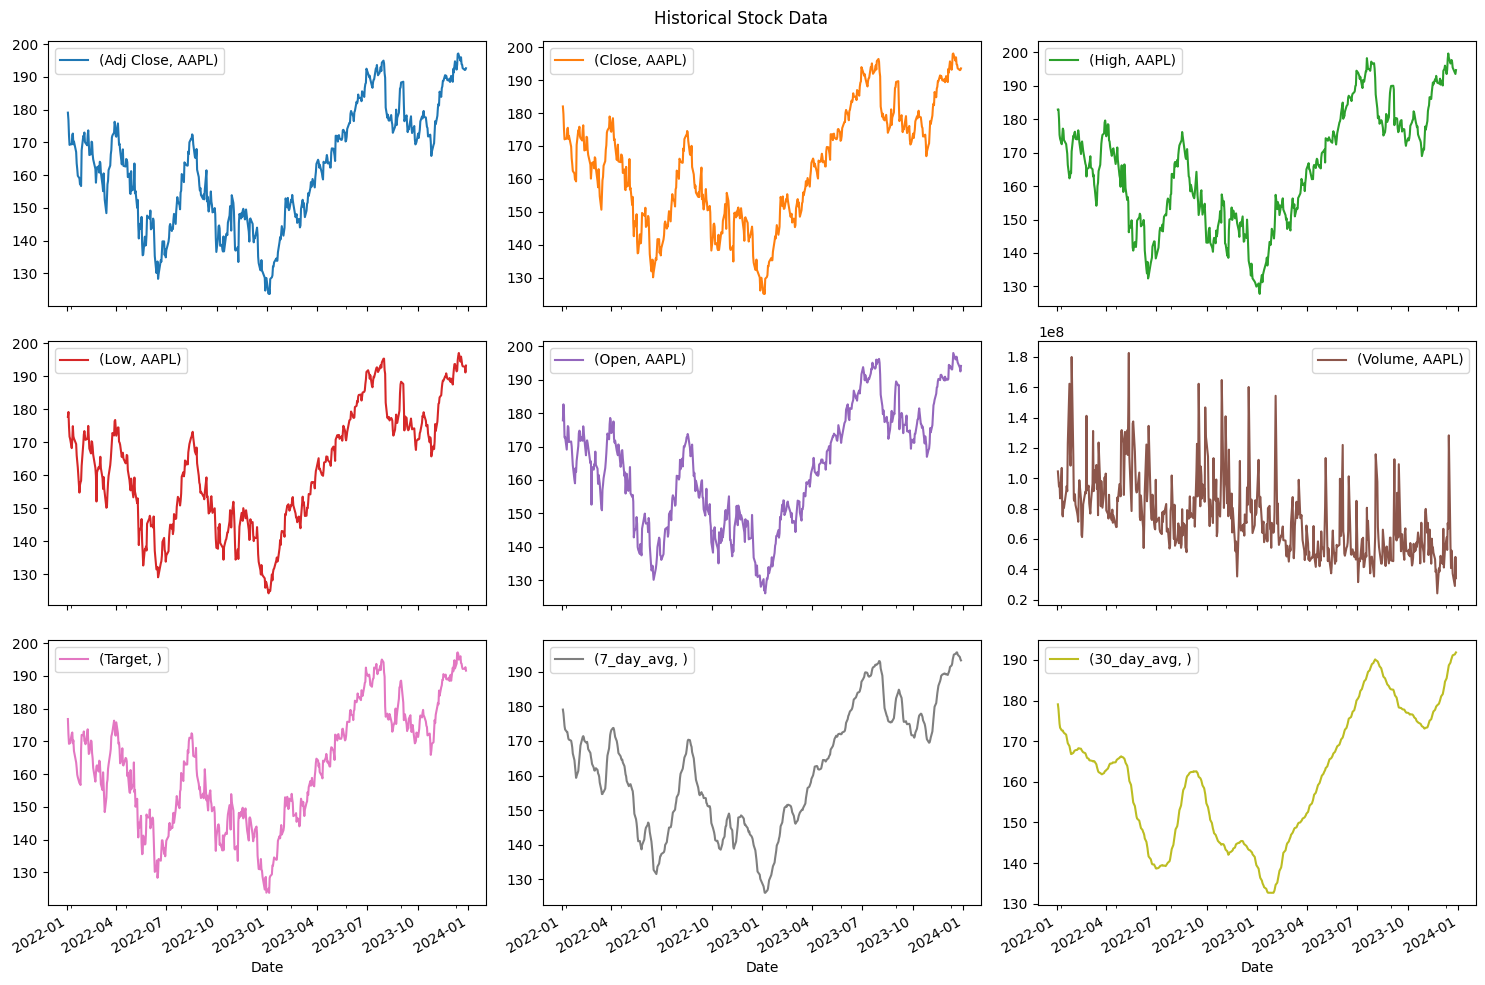

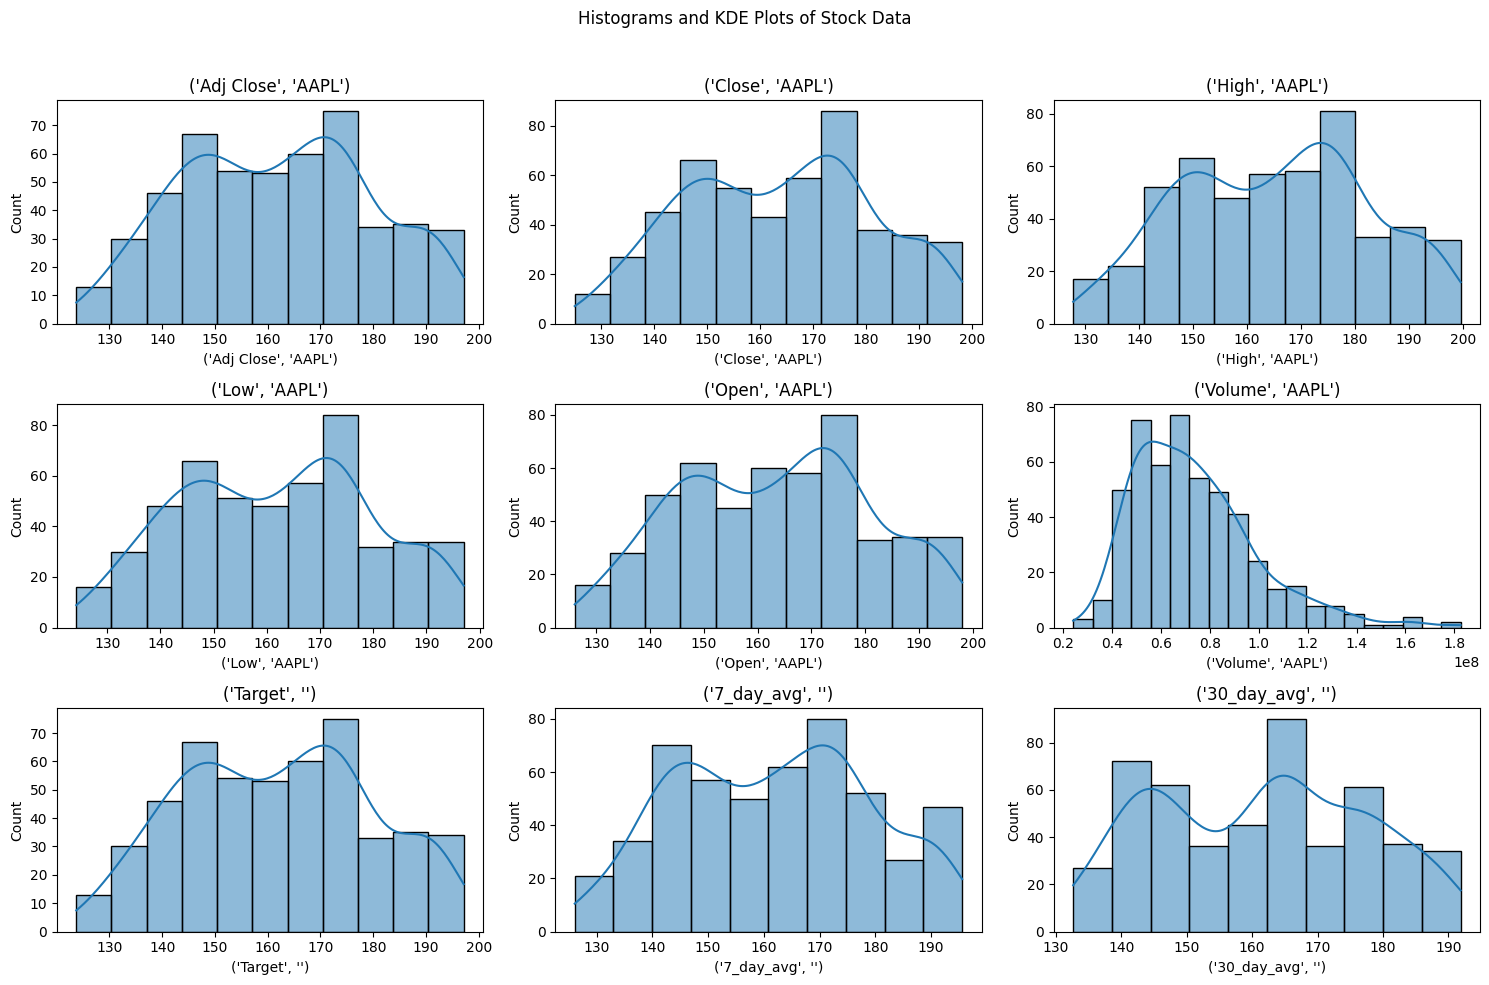

In [12]:
import seaborn as sns

# Plot historical view of all columns in the stock data using subplots
plt.figure(figsize=(12, 6))
stock_data.plot(subplots=True, layout=(3, 3), figsize=(15, 10), title='Historical Stock Data')
plt.tight_layout()
plt.show()

# Plot histograms and KDE plots of all columns in the stock data using subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Histograms and KDE Plots of Stock Data')

for i, column in enumerate(stock_data.columns):
	sns.histplot(stock_data[column], kde=True, ax=axes[i // 3, i % 3])
	axes[i // 3, i % 3].set_title(column)

# Remove any empty subplots
for j in range(i + 1, 9):
	fig.delaxes(axes[j // 3, j % 3])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<B>Observations:</B>
- The plots for Close and Adjusted Close prices are quite similar, suggesting that there have been no significant corporate action events during the period of the charts.
- The above charts indicate that Apple's stock price hit a minimum during Jan 2023.
- The Volume chart has a long tail and is skewed to the right side, indicating the presence of outliers.

In [13]:
# Split the data into training and test sets
split_date = pd.to_datetime('2023-10-01')
train = stock_data.loc[stock_data.index < split_date]
test = stock_data.loc[stock_data.index >= split_date]

<H3>Exponential Smoothing Model</H3>

2023-09-07   170.03
2023-09-08   169.83
2023-09-11   169.84
2023-09-12   169.12
2023-09-13   168.36
Freq: B, dtype: float64

--- Exponential Smoothing Model Metrics ---
Mean Absolute Error (MAE): 27.94
Mean Squared Error (MSE): 1066.95
Root Mean Squared Error (RMSE): 32.66

--- Exponential Smoothing Model Plot and Predicted Trends ---


/var/folders/hb/nkxmxsw97pdfl0tp0wlzf79m0000gn/T/ipykernel_58923/3034887651.py:12: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  ).fit(smoothing_level=0.2, smoothing_slope=0.1)


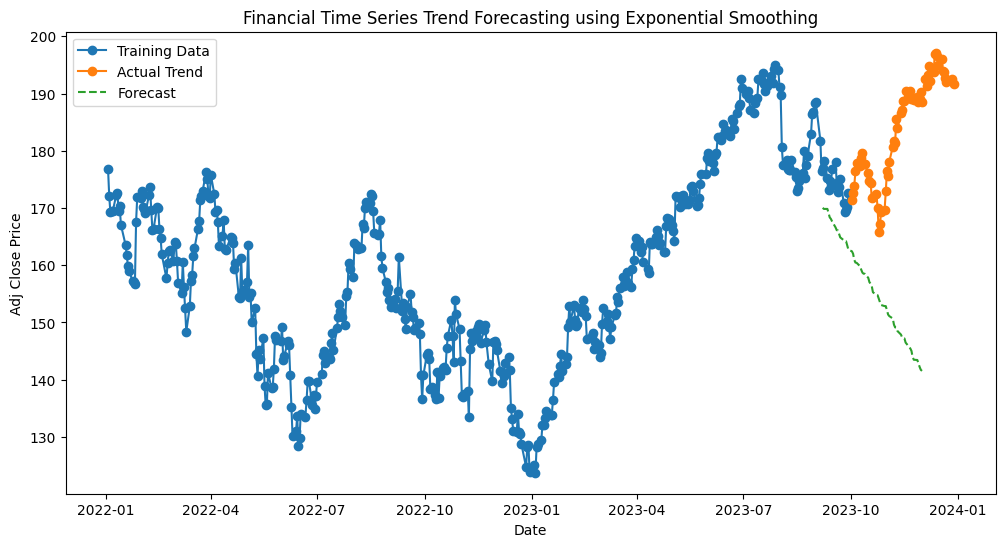

In [14]:
# Convert stock data to pandas Series with a datetime index
index = pd.date_range(start='2022-01-03', periods=len(train), freq='B')

# Convert data to pandas Series with a datetime index
series = pd.Series(train['Target'].values.flatten(), index=index)

#Normalize the data
normalized_series = (series - series.mean()) / series.std()

# Apply Exponential Smoothing with trend and seasonality
model = ExponentialSmoothing(normalized_series, trend='add', seasonal='add', seasonal_periods=12
                             ).fit(smoothing_level=0.2, smoothing_slope=0.1)

# Forecast the next periods
forecast = model.forecast(len(test))
#inverse the normalization
forecast = forecast * series.std() + series.mean()
print(forecast[:5])

# Create a new index for the forecasted data
forecast_index = pd.date_range(start=normalized_series.index[-1] + pd.Timedelta(days=1), periods=len(test), freq='B')
forecast_series = pd.Series(forecast.values, index=forecast_index)

# Calculate performance metrics
# Ensure the lengths of the arrays match
test_subset = test['Target'].iloc[:len(test)]
mae_es = mean_absolute_error(test_subset, forecast)
mse_es = mean_squared_error(test_subset, forecast)
rmse_es = np.sqrt(mse_es)

# Print performance metrics
print("\n--- Exponential Smoothing Model Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_es:.2f}")
print(f"Mean Squared Error (MSE): {mse_es:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_es:.2f}")

# Plot the original data and the forecast
print("\n--- Exponential Smoothing Model Plot and Predicted Trends ---")
plt.figure(figsize=(12, 6))
plt.plot(train['Target'], label='Training Data', marker='o')
plt.plot(test['Target'], label='Actual Trend', marker='o')
plt.plot(forecast_series, label='Forecast', linestyle='--')
plt.title('Financial Time Series Trend Forecasting using Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

<B>Observations</B>
- The exponential smoothing model does not predict well as its RMSE is very high.
- Smoothing Parameters: The hyperparameters smoothing level (alpha), trend (beta), and seasonal (gamma) can be used to fine-tune the smoothing model.
- Seasonal Periods: This parameter must be set correctly to match the seasonality in the data

<H3>Linear Regression Model</H3>


-------Training Data (Features)-------
Price      7_day_avg 30_day_avg
Ticker                         
Date                           
2022-01-03 179.08    179.08    
2022-01-04 177.94    177.94    
2022-01-05 175.99    175.99    
2022-01-06 174.30    174.30    
2022-01-07 173.32    173.32    

-------Training Data (Label)-------
Date
2022-01-03   176.80
2022-01-04   172.10
2022-01-05   169.23
2022-01-06   169.40
2022-01-07   169.41
Name: Target, dtype: float64

-------Test Data (Features)-------
Price      7_day_avg 30_day_avg
Ticker                         
Date                           
2023-10-02 171.63    176.99    
2023-10-03 171.29    176.88    
2023-10-04 170.95    176.76    
2023-10-05 171.37    176.55    
2023-10-06 172.37    176.59    
X_test_lr shape:  (62, 2)
y_test_lr shape:  (62,)
<class 'pandas.core.series.Series'>
DatetimeIndex: 62 entries, 2023-10-02 to 2023-12-28
Series name: Target
Non-Null Count  Dtype  
--------------  -----  
62 non-null     float64
dtypes: flo

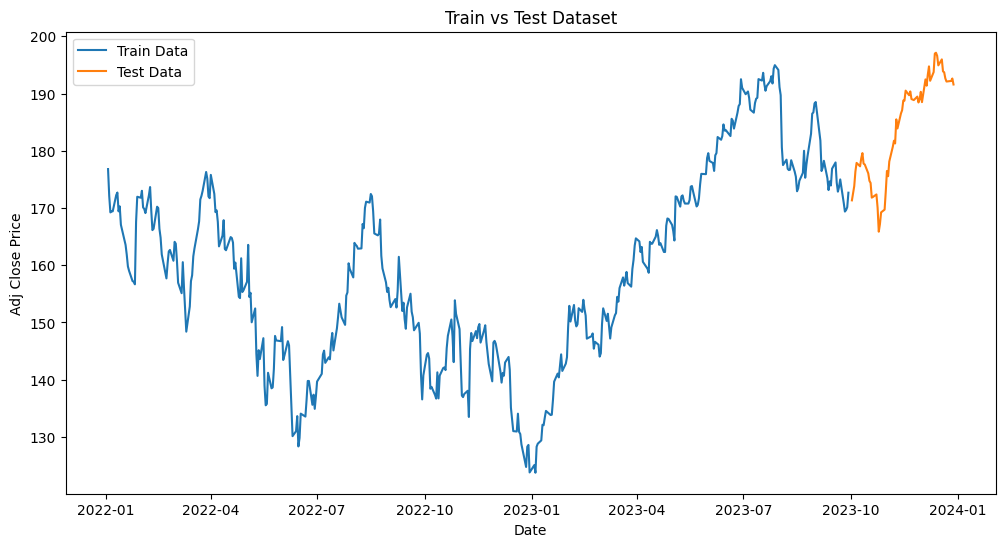

In [15]:
#Adj Close Close  High   Low    Open   Volume     Target 7_day_avg 30_day_avg
# Prepare the training and test data for Linear Regression
# X_train_lr = train[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', '7_day_avg', '30_day_avg']]
X_train_lr = train[['7_day_avg', '30_day_avg']]
print('\n-------Training Data (Features)-------')
print(np.round(X_train_lr.head(),2))
print('\n-------Training Data (Label)-------')
# y_train = train['Close']
y_train_lr = train['Target']
print(np.round(y_train_lr.head(),2))
# X_test_lr = test[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', '7_day_avg', '30_day_avg']]
X_test_lr = test[['7_day_avg', '30_day_avg']]
print('\n-------Test Data (Features)-------')
print(np.round(X_test_lr.head(),2))
print("X_test_lr shape: ", X_test_lr.shape)
y_test_lr = test['Target']
print("y_test_lr shape: ", y_test_lr.shape)
print(y_test_lr.info())

# Visualization of Train and Test Datasets
print('\n-------Plot of Train and Test Datasets-------')
plt.figure(figsize=(12, 6))
# plt.plot(train.index, train['Close'], label='Train Data')
# plt.plot(test.index, test['Close'], label='Test Data')
plt.plot(train.index, train['Target'], label='Train Data')
plt.plot(test.index, test['Target'], label='Test Data')
plt.title('Train vs Test Dataset')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

Date
2023-10-02   171.33
2023-10-03   172.59
2023-10-04   173.83
2023-10-05   176.39
2023-10-06   177.88
Name: Target, dtype: float64
(62,)

--- Linear Regression Model Metrics ---
Mean Absolute Error (MAE): 3.33
Mean Squared Error (MSE): 16.84
Root Mean Squared Error (RMSE): 4.10

--- Linear Regression Model Plot and Predicted Trends ---


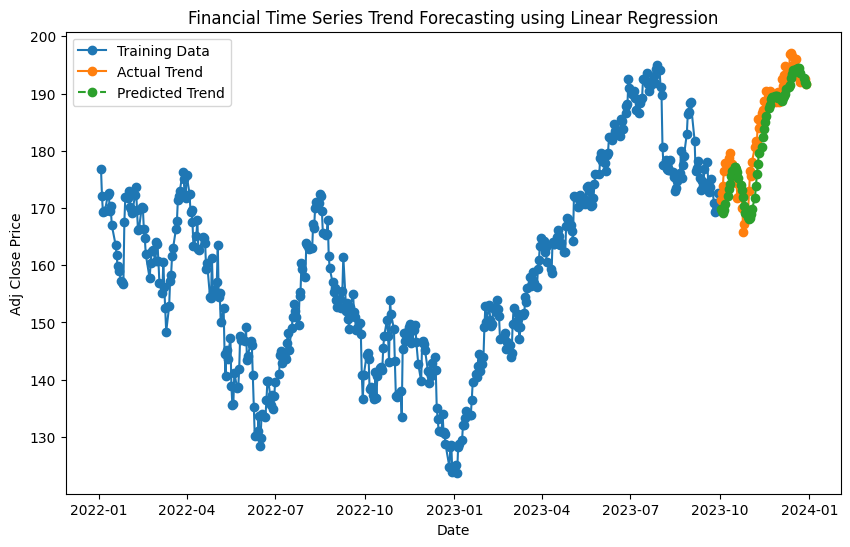

In [16]:
# Fit a linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)

# Predict the trend for the test set
predictions = model_lr.predict(X_test_lr)

print(y_test_lr.head())
print(y_test_lr.shape)
#convert to dataframe
y_test_lr = y_test_lr.to_frame()
y_test_lr['Trend_Predicted'] = predictions

# Calculate performance metrics
# mae_lr = mean_absolute_error(test['Close'], test['Trend_Predicted'])
# mse_lr = mean_squared_error(test['Close'], test['Trend_Predicted'])
mae_lr = mean_absolute_error(y_test_lr['Target'], y_test_lr['Trend_Predicted'])
mse_lr = mean_squared_error(y_test_lr['Target'], y_test_lr['Trend_Predicted'])
rmse_lr = np.sqrt(mse_lr)

# Print performance metrics
print("\n--- Linear Regression Model Metrics ---")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")

# Plot the actual and predicted trends
print("\n--- Linear Regression Model Plot and Predicted Trends ---")
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Target'], label='Training Data', marker='o')
plt.plot(test.index, test['Target'], label='Actual Trend', marker='o')
plt.plot(test.index, y_test_lr['Trend_Predicted'], label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


<B>Observations:</B>
- Since stock prices prediction is essentially a regression problem, the RMSE (Root Mean Squared Error) and MAPE (Mean Absolute Percentage Error %) are our model evaluation metrics. Both are useful measures of forecast accuracy. 

In [17]:
#Calculate and print the feature importance
feature_importance = model_lr.coef_
print('\n--- Feature Importance ---')
print(feature_importance)

#Align the feature importance with the feature names
feature_importance_df = pd.DataFrame({'Feature': X_train_lr.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print('\n--- Feature Importance DataFrame ---')
print(feature_importance_df)


--- Feature Importance ---
[ 1.13454849 -0.18917541]

--- Feature Importance DataFrame ---
  Feature          Importance
0   (7_day_avg, )  1.13      
1  (30_day_avg, ) -0.19      


## Extra Credit Assignment (50 points total)

### Objective
Build an LSTM model to predict the closing prices of Apple Inc. (AAPL) stock and compare it to the models in the core assignment.

### Deliverables and Points Breakdown

1. **LSTM Model Implementation (30 points)**
   - Develop an LSTM model on the given dataset.
   - Ensure proper configuration and parameter tuning.

2. **Model Prediction and Visualization (10 points)**
   - Use the model to predict the test dataset.
   - Visualize the prediction results.

3. **Model Evaluation and Comparative Analysis (10 points)**
   - Evaluate the model using appropriate metrics.
   - Compare with the models from the core assignment and discuss the findings.

In [18]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import Series

#Adj Close Close  High   Low    Open   Volume  
#Remove Volume as it has 0 importance
# stock_data_select = stock_data[['Adj Close', 'Close', 'Open', 'High', '7_day_avg', '30_day_avg', 'Target']]
stock_data_select = stock_data[['7_day_avg', '30_day_avg', 'Target']]
# stock_data_select = stock_data[['7_day_avg', 'Close']]
# print(stock_data_select.head())
# Split the data into training and test sets
split_date = pd.to_datetime('2023-10-01')
train = stock_data_select.loc[stock_data_select.index < split_date]
test = stock_data_select.loc[stock_data_select.index >= split_date]
print('\n-------Train and Test data before scaling-------')
print(np.round(train.head(),4))
print("\n")
print(np.round(test.head(),4)) 

# transform scale
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

print("\n-------Train and Test after scaling-------")
print(np.round(train_scaled[:5],4))
print("\n")
print(np.round(test_scaled[:5],4))

pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("\n-------Train and Test after inverse-scaling-------")
inverted_train = scaler.inverse_transform(train_scaled)
print("\n")
print(np.round(inverted_train[:5],4))
inverted_test = scaler.inverse_transform(test_scaled)
print("\n")
print(np.round(inverted_test[:5],4))

#Get features and target from the scaled data
X_train_scaled = train_scaled[:, :-1]
#get last column as target
y_train_scaled = train_scaled[:, -1]

X_test_scaled = test_scaled[:, :-1]
#get last column as target
y_test_scaled = test_scaled[:, -1]


-------Train and Test data before scaling-------
Price      7_day_avg 30_day_avg Target
Ticker                                
Date                                  
2022-01-03 179.08    179.08     176.80
2022-01-04 177.94    177.94     172.10
2022-01-05 175.99    175.99     169.23
2022-01-06 174.30    174.30     169.40
2022-01-07 173.32    173.32     169.41


Price      7_day_avg 30_day_avg Target
Ticker                                
Date                                  
2023-10-02 171.63    176.99     171.33
2023-10-03 171.29    176.88     172.59
2023-10-04 170.95    176.76     173.83
2023-10-05 171.37    176.55     176.39
2023-10-06 172.37    176.59     177.88

-------Train and Test after scaling-------
[[0.7908 0.8075 0.745 ]
 [0.7738 0.7877 0.679 ]
 [0.7448 0.7539 0.6387]
 [0.7196 0.7244 0.641 ]
 [0.7049 0.7074 0.6413]]


[[0.6798 0.7713 0.6683]
 [0.6747 0.7693 0.6858]
 [0.6696 0.7672 0.7033]
 [0.6758 0.7636 0.7392]
 [0.6908 0.7643 0.7602]]

-------Train and Test after inverse

<H4>Build LSTM Model</H4>

In [19]:
#!pip install tensorflow keras

In [20]:
# Define the number of time steps
n_steps = 1 #X_train_scaled.shape[0]
n_features = X_train_scaled.shape[1]
print(f"# of features: {n_features} #of time-steps: {n_steps}")
print('\n-------Shape of scaled train and test data after reshaping-------')
print("X_train_scaled shape: ", X_train_scaled.shape)
print("y_train_scaled shape: ", y_train_scaled.shape) 
print("X_test_scaled shape: ", X_test_scaled.shape)
print("y_test_scaled shape: ", y_test_scaled.shape)

# Convert the x_train and y_train to numpy arrays 
X_train_scaled, y_train_scaled = np.array(X_train_scaled), np.array(y_train_scaled)
X_test_scaled, y_test_scaled = np.array(X_test_scaled), np.array(y_test_scaled)

# Ensure the number of elements matches the shape
assert X_train_scaled.shape[1] == n_features, f"Number of features does not match: expected {n_features}, got {X_train_scaled.shape[1]}"
assert X_test_scaled.shape[1] == n_features, f"Number of features does not match: expected {n_features}, got {X_test_scaled.shape[1]}"
assert y_train_scaled.shape[0] == X_train_scaled.shape[0], f"Number of samples does not match: expected {X_train_scaled.shape[0]}, got {y_train_scaled.shape[0]}"
assert y_test_scaled.shape[0] == X_test_scaled.shape[0], f"Number of samples does not match: expected {X_test_scaled.shape[0]}, got {y_test_scaled.shape[0]}"

# Reshape the input data for LSTM
# LSTM expects the input data to be in a 3D format of [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0],1,n_features)
print("X_train_reshaped shape: ", X_train_reshaped.shape)
print(X_train_reshaped[:5])
#reshape y_train
y_train_reshaped = y_train_scaled.reshape(y_train_scaled.shape[0],1)
print("y_train_reshaped shape: ",y_train_reshaped.shape)
print(y_train_reshaped[:5])

# of features: 2 #of time-steps: 1

-------Shape of scaled train and test data after reshaping-------
X_train_scaled shape:  (438, 2)
y_train_scaled shape:  (438,)
X_test_scaled shape:  (62, 2)
y_test_scaled shape:  (62,)
X_train_reshaped shape:  (438, 1, 2)
[[[0.79078907 0.80751941]]

 [[0.77384094 0.78774618]]

 [[0.74481173 0.75387808]]

 [[0.71958561 0.724447  ]]

 [[0.70494877 0.70737034]]]
y_train_reshaped shape:  (438, 1)
[[0.74502096]
 [0.67901713]
 [0.63869739]
 [0.64104447]
 [0.64132072]]


In [21]:
# Define the LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam, AdamW, RMSprop
import random
from keras.regularizers import l2, l1
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

def create_lstm_model(neurons=50, n_steps=1, n_features=2, dropout=0.2, optimizer='adam', 
                      learning_rate=0.001, layers=1, l1_reg=0.005, l2_reg=0.01):
    #update the model to use layers
    
    model = Sequential()
    model.add(LSTM(neurons, activation='relu', input_shape=(n_steps, n_features), return_sequences=True))   
    model.add(Dropout(dropout))
    for i in range(layers-1):
        model.add(LSTM(neurons, activation='relu', return_sequences=True))
        model.add(Dropout(dropout))
    model.add(LSTM(neurons, activation='relu', return_sequences=False))
    model.add(Dropout(dropout))
    model.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1_reg, l2=l2_reg)))
    if (optimizer == 'adam'):
        optimizer = Adam(learning_rate=learning_rate)
    elif (optimizer == 'adamw'):
        optimizer = AdamW(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)
        
    model.compile(optimizer=optimizer, loss='mse')
    
    return model

<B>Observations:</B> 
- LSTM (Long Short Term Memory) is a recurrent neural network that takes a 3D input (samples, steps, features), where 
    - Samples: This is the number of sequences in the dataset. There are 438 samples in the training dataset since there are 438 sequences of stock prices.
    - Steps or Timesteps: The number of time steps in each sequence. Since we have daily prices, the #steps is 1 business day.
    - Features: This is the number of features at each time step. Since we are considering 7_day_average and 30_day_average as features, this input parameter would be set to 2.
- The key parameters involved in the LSTM model are as follows:
    - Number of LSTM Units: The number of units (neurons) in each LSTM layer. More units can capture more complex patterns but may increase the risk of overfitting.
    - Number of LSTM Layers: The number of LSTM layers in the model.More layers can capture deeper temporal dependencies but may increase the risk of overfitting and computational cost.
    - Dropout Rate: The dropout rate can be used to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.
    - Learning Rate: The learning rate for the optimizer. Controls the step size during gradient descent. A lower learning rate can lead to more stable convergence but may require more epochs.
    - Batch Size:  The number of samples per gradient update. Smaller batch sizes can lead to more stable training but may increase training time.
    - Number of Epochs: One epoch is a complete pass through the entire training set. The number of epochs to train the model. More epochs can lead to better training but may increase the risk of overfitting.
    - Optimizer: The optimization algorithm to use.Different optimizers can affect the convergence speed and stability.
    - Activation Function: The activation function used in the LSTM layers. Different activation functions can affect the model's ability to capture non-linear relationships.
    - L2 Regularization (Weight Decay): L2 (ridge) regularization adds a penalty proportional to the square of the magnitude of the weights.


-------Model Summary-------


/Users/shriniwasiyengar/git/ELVTR-AIFS/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 100)         │        41,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,101 (789.46 KB)

 Trainable params: 202,101 (789.46 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/300


2024-12-11 21:20:59.868897: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2024-12-11 21:20:59.869219: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2115 - val_loss: 0.6683
Epoch 2/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2066 - val_loss: 0.6600
Epoch 3/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2024 - val_loss: 0.6517
Epoch 4/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1983 - val_loss: 0.6432
Epoch 5/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1940 - val_loss: 0.6346
Epoch 6/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1897 - val_loss: 0.6256
Epoch 7/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1852 - val_loss: 0.6163
Epoch 8/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1807 - val_loss: 0.6068
Epoch 9/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1760 - val_loss: 0.5970
Epoch 10/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1713 - val_loss: 0.5868
Epoch 11/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1664 - val_loss: 0.5762
Epoch 12/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1614 - val_lo

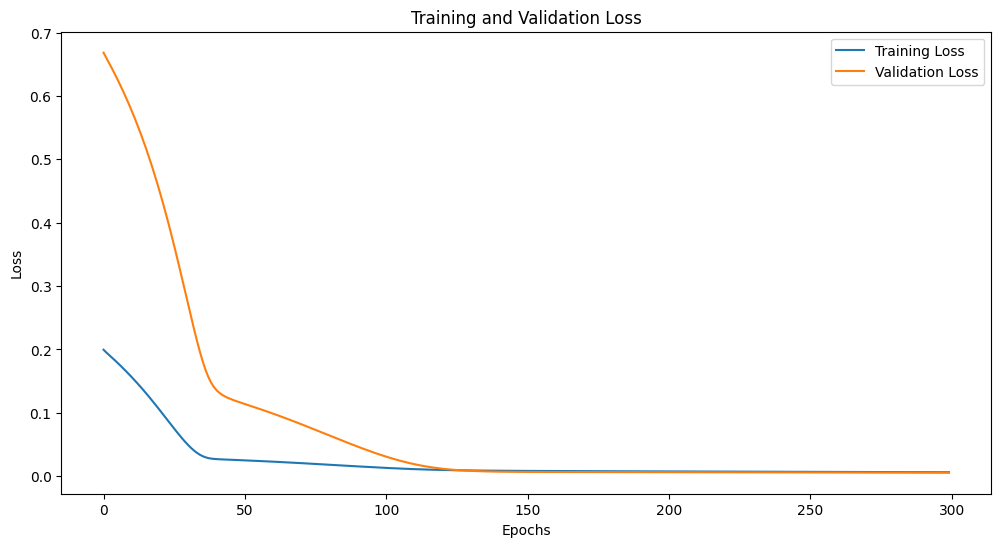

In [22]:
# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Configure TensorFlow for deterministic operations
# Note: This may impact performance
tf.config.experimental.enable_op_determinism()

# Build LSTM model
#4.12 RMSE
# batch_size = 16
# n_steps = 1 #X_train_scaled.shape[0]#1 #X_train_reshaped.shape[1]
# n_features = 2 #X_train_scaled.shape[1]
# neurons = 100
# epochs = 300
# dropout = 0.01
# learning_rate = 0.0005
# optimizer = AdamW(learning_rate=learning_rate)
# layers = 2
# l1_reg = 0.000
# l2_reg = 0.0005

#4.05 RMSE
# batch_size = 16
# n_steps = 1 #X_train_scaled.shape[0]#1 #X_train_reshaped.shape[1]
# n_features = 2 #X_train_scaled.shape[1]
# neurons = 100
# epochs = 300
# dropout = 0.01
# learning_rate = 0.0001
# optimizer = AdamW(learning_rate=learning_rate)
# layers = 2
# l1_reg = 0.000
# l2_reg = 0.0005

#3.98 RMSE
batch_size = 16
n_steps = 1 #X_train_scaled.shape[0]#1 #X_train_reshaped.shape[1]
n_features = 2 #X_train_scaled.shape[1]
neurons = 100
epochs = 300
dropout = 0.000
learning_rate = 0.0001
optimizer = AdamW(learning_rate=learning_rate)
layers = 2
l1_reg = 0.000
l2_reg = 0.0005

# model_lstm.compile(optimizer=optimizer, loss='mse')
model_lstm = create_lstm_model(neurons=neurons, n_steps = n_steps, n_features = n_features, dropout=dropout, optimizer=optimizer, 
                               learning_rate=learning_rate, layers=layers, l1_reg=l1_reg, l2_reg=l2_reg)
print('-------Model Summary-------')
print(model_lstm.summary())

#add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
# #add learning rate reduction
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=100, min_lr=0.0001)
# Train the LSTM model and capture the training history
history = model_lstm.fit(X_train_reshaped, y_train_reshaped, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2 , callbacks=[early_stopping])

# Plot the training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<B>Observation</B>
Overfitting of the LSTM model can be detected by plotting the training and validation loss over epochs. If the training loss continues to decrease while the validation loss starts to increase, it indicates that the model is overfitting to the training data.

In this case, the above plot indicates that there is no overfitting.

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

print("X_test_scaled shape before reshaping: ", X_test_scaled.shape)
# print(X_test_scaled[:5])
n_steps = 1  # Update the number of time steps to 1
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], n_steps, n_features)
print("Test Data Shape: ", X_test_reshaped.shape)
# print(X_test_reshaped[:5])

# Make predictions
predictions = model_lstm.predict(X_test_reshaped)
print(predictions.shape)
# predictions = scaler.inverse_transform(predictions)
print(predictions[:5])

# Ensure the predictions have the same length as the test data
predictions_reshaped = predictions.reshape(-1,1)  # Reshape predictions to 2D array
# Create a DataFrame with the same structure as the original data for inverse transformation
# predictions_lstm = pd.DataFrame(predictions_reshaped, columns=['Trend_Predicted'])
predictions_lstm = pd.DataFrame()
predictions_lstm['7_day_avg'] = X_test_scaled[:, 0]
predictions_lstm['30_day_avg'] = X_test_scaled[:, 1]
(predictions_lstm['Trend_Predicted']) = predictions_reshaped
# print(predictions_lstm.head())
print("=======")
# Ensure predictions_df is a DataFrame before inverse transformation
predictions_lstm = scaler.inverse_transform(predictions_lstm)
print(predictions_lstm[:5])
# Ensure 'Target' column is included in the test DataFrame
predictions_lstm = pd.DataFrame(predictions_lstm, columns=['7_day_avg', '30_day_avg', 'Trend_Predicted'])
print(predictions_lstm.head())

# Calculate performance metrics
mae_lstm = mean_absolute_error(test['Target'], predictions_lstm['Trend_Predicted'])
mse_lstm = mean_squared_error(test['Target'], predictions_lstm['Trend_Predicted'])
rmse_lstm = np.sqrt(mse_lstm)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae_lstm:.2f}")
print(f"Mean Squared Error (MSE): {mse_lstm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm:.2f}")

X_test_scaled shape before reshaping:  (62, 2)
Test Data Shape:  (62, 1, 2)
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step

2024-12-11 21:21:14.277570: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2024-12-11 21:21:14.278218: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
(62, 1)
[[0.6823009 ]
 [0.67789125]
 [0.6734267 ]
 [0.6777921 ]
 [0.689913  ]]
[[171.63336836 176.99225566 172.33482503]
 [171.29404776 176.87829793 172.02062367]
 [170.95046997 176.76003367 171.70251083]
 [171.36929321 176.55431366 172.01355667]
 [172.37162781 176.59108429 172.87720482]]
   7_day_avg  30_day_avg  Trend_Predicted
0 171.63     176.99      172.33          
1 171.29     176.88      172.02          
2 170.95     176.76      171.70          
3 171.37     176.55      172.01          
4 172.37     176.59      172.88          
Mean Absolute Error (MAE): 3.35
Mean Squared Error (MSE): 15.85
Root Mean Squared Error (RMSE): 3.98


Price      7_day_avg 30_day_avg Target
Ticker                                
Date                                  
2022-01-03 179.08    179.08     176.80
2022-01-04 177.94    177.94     172.10
2022-01-05 175.99    175.99     169.23
2022-01-06 174.30    174.30     169.40
2022-01-07 173.32    173.32     169.41


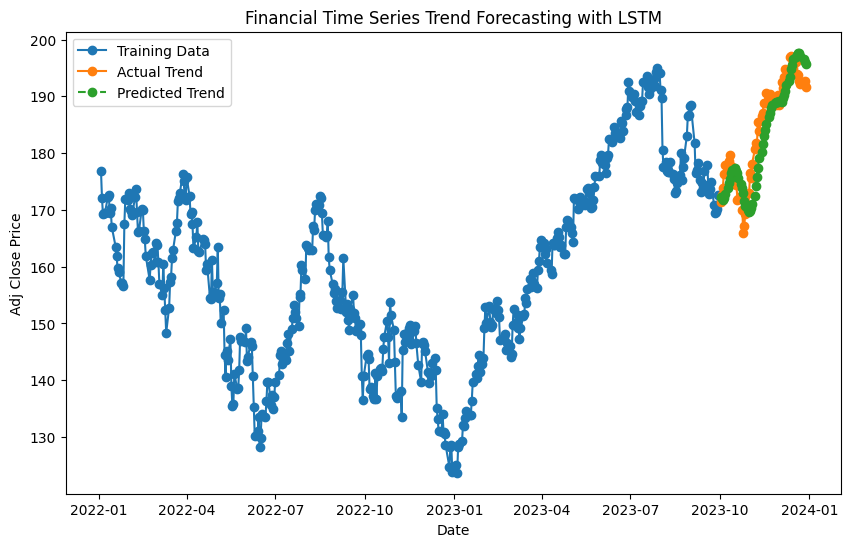

In [24]:
#plot the actual and predicted trends
plt.figure(figsize=(10, 6))
print(train.head())
plt.plot(train.index, train['Target'], label='Training Data', marker='o')
plt.plot(test.index, test['Target'], label='Actual Trend', marker='o')
plt.plot(test.index, predictions_lstm['Trend_Predicted'], label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting with LSTM')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

<H3>Comparison of Models</H3>

<H4>Metrics Comparison</H4>

Exponential Smoothing Model Metrics
- Mean Absolute Error (MAE): 27.94
- Mean Squared Error (MSE): 1066.86
- Root Mean Squared Error (RMSE): 32.66

Linear Regression Model Metrics
- Mean Absolute Error (MAE): 3.33
- Mean Squared Error (MSE): 16.84
- Root Mean Squared Error (RMSE): 4.10

LSTM Metrics:
- Mean Absolute Error (MAE): 3.35
- Mean Squared Error (MSE): 15.85
- Root Mean Squared Error (RMSE): 3.98

Overall, the LSTM model performed better than the Exponential Smoothing and  Linear Regression models as it had a lower RMSE.

<H4>Forecast Plots Comparison</H4>

/var/folders/hb/nkxmxsw97pdfl0tp0wlzf79m0000gn/T/ipykernel_58923/1891169453.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Trend_Predicted'] = np.nan


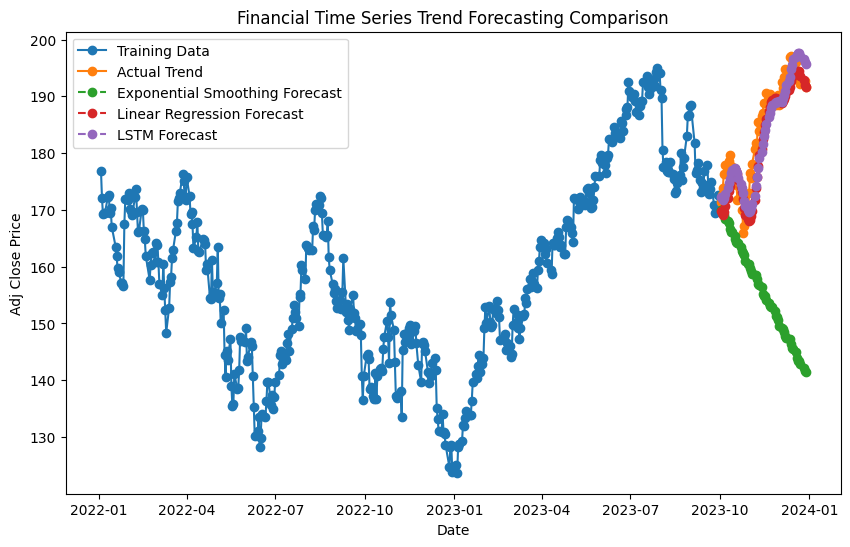

In [25]:
# Extend the forecast to match the length of the test dataset
forecast_extended = np.concatenate([forecast, np.full(len(test) - len(forecast), np.nan)])

# Ensure 'Trend_Predicted' column exists in the test DataFrame
if 'Trend_Predicted' not in test.columns:
	test['Trend_Predicted'] = np.nan

# Plot the actual and predicted trends for exponential smoothing, linear regression and LSTM models
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Target'], label='Training Data', marker='o')
plt.plot(test.index, test['Target'], label='Actual Trend', marker='o')
plt.plot(test.index, forecast_extended, label='Exponential Smoothing Forecast', linestyle='--', marker='o')
plt.plot(test.index, y_test_lr['Trend_Predicted'], label='Linear Regression Forecast', linestyle='--', marker='o')
plt.plot(test.index, predictions_lstm['Trend_Predicted'], label='LSTM Forecast', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting Comparison')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


<H4>Features Comparison</H4>

| Model                  | Pros                                                                                                                                                                                                 | Cons                                                                                                                                                                                                 |
|------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Exponential Smoothing  | Simplicity: Exponential smoothing models are relatively simple to understand and implement. They require fewer computational resources compared to more complex models.                               | Limited Complexity: These models may not perform well with complex patterns or non-linear relationships in the data.                                                                                |
|                        | Effective for Short-Term Forecasting: These models are effective for short-term forecasting, especially when the data exhibits a clear trend or seasonal pattern.                                    | Assumes Stationarity: Basic exponential smoothing assumes that the underlying data is stationary, which may not always be the case.                                                                 |
|                        | Handles Seasonality and Trends: Variants like Holt-Winters exponential smoothing can handle both trends and seasonality in the data.                                                                 | Not Suitable for Long-Term Forecasting: These models may not be suitable for long-term forecasting as they primarily focus on short-term trends.                                                    |
|                        | Less Data Required: Exponential smoothing models can work well with smaller datasets.                                                                                                                |                                                                                                                                                                                                     |
| Linear Regression      | Simplicity and Interpretability: Linear regression is easy to understand and interpret. The coefficients provide insights into the relationship between the independent and dependent variables.      | Assumes Linearity: Linear regression assumes a linear relationship between the independent and dependent variables, which may not always be the case.                                                |
|                        | Fast and Efficient: Linear regression is computationally efficient and can be quickly applied to large datasets.                                                                                      | Sensitive to Outliers: Linear regression is sensitive to outliers, which can significantly affect the model's performance.                                                                          |
|                        | Good for Linearly Separable Data: It performs well when the relationship between the independent and dependent variables is linear.                                                                   | Limited to Linear Relationships: It cannot capture complex, non-linear relationships in the data.                                                                                                   |
| Long Short-Term Memory (LSTM) | Handles Sequential Data: LSTM networks are designed to handle sequential data and can capture long-term dependencies and patterns in time series data.                                          | Complexity and Computational Cost: LSTMs are complex models that require significant computational resources and time to train, especially on large datasets.                                        |
|                        | Non-Linear Relationships: LSTMs can model complex, non-linear relationships in the data, making them suitable for a wide range of applications.                                                      | Requires Large Datasets: LSTMs typically require large amounts of data to train effectively and avoid overfitting.                                                                                   |
|                        | Robust to Noise: LSTMs are relatively robust to noise in the data and can generalize well to unseen data.                                                                                            | Hyperparameter Tuning: LSTMs have many hyperparameters that need to be tuned, which can be time-consuming and challenging.                                                                          |

<B>Summary</B>
- Exponential Smoothing: Simple and effective for short-term forecasting with clear trends or seasonality but limited in handling complex patterns and long-term forecasting.
- Linear Regression: Easy to understand and efficient for linear relationships but limited in capturing non-linear relationships and sensitive to outliers.
- LSTM: Powerful for modeling sequential data and capturing long-term dependencies but complex, computationally expensive, and requires large datasets and careful hyperparameter tuning.